Площадь башни: 300.000
Суммарная площадь окон: 23.000
Теоретическая геометрическая вероятность: 0.076667
Эмпирическая вероятность : 0.076400


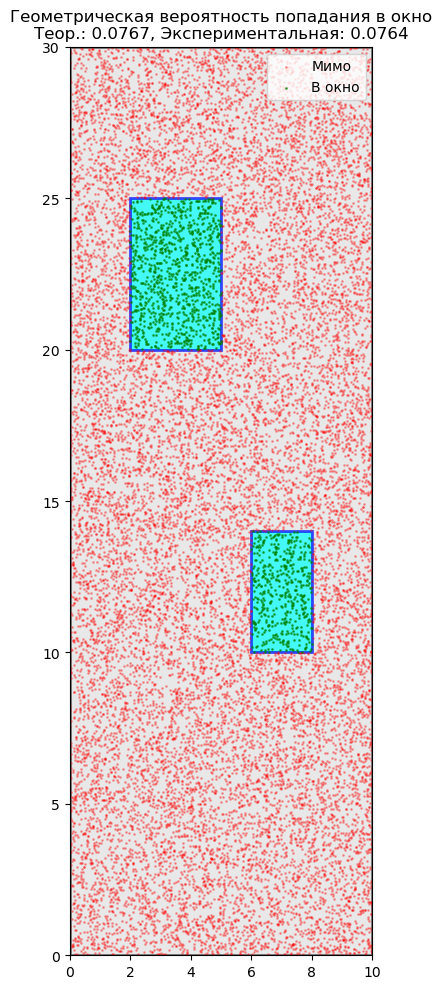

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

W, H = 10.0, 30.0  # размеры башни

# Окна: (x, y, width, height)
windows = [
    (2.0, 20.0, 3.0, 5.0),
    (6.0, 10.0, 2.0, 4.0)
]

N = 20_000  # количество случайных точек

tower_area = W * H
windows_area = sum(w[2] * w[3] for w in windows)
p_theor = windows_area / tower_area

print(f"Площадь башни: {tower_area:.3f}")
print(f"Суммарная площадь окон: {windows_area:.3f}")
print(f"Теоретическая геометрическая вероятность: {p_theor:.6f}")

# Генерация точек
xs = np.random.uniform(0, W, N)
ys = np.random.uniform(0, H, N)

# Списки для разделения попавших и не попавших точек
xs_in, ys_in = [], []
xs_out, ys_out = [], []

get_in = 0

for i in range(N):
    x = xs[i]
    y = ys[i]

    hit = False
    for wx, wy, ww, wh in windows:
        if (wx <= x <= wx + ww) and (wy <= y <= wy + wh):
            hit = True
            break

    if hit:
        get_in += 1
        xs_in.append(x)
        ys_in.append(y)
    else:
        xs_out.append(x)
        ys_out.append(y)

p_empirical = get_in / N
print(f"Эмпирическая вероятность : {p_empirical:.6f}")


fig, ax = plt.subplots(figsize=(4, 10))

tower_rect = Rectangle((0, 0), W, H, linewidth=2,
                       edgecolor='black', facecolor='lightgray', alpha=0.5)
ax.add_patch(tower_rect)

for wx, wy, ww, wh in windows:
    win_rect = Rectangle((wx, wy), ww, wh, linewidth=2,
                         edgecolor='blue', facecolor='cyan', alpha=0.7)
    ax.add_patch(win_rect)

# Мимо и в окно
ax.scatter(xs_out, ys_out, s=1, color='red', alpha=0.3, label='Мимо')
ax.scatter(xs_in, ys_in, s=1, color='green', alpha=0.6, label='В окно')

ax.set_xlim(0, W)
ax.set_ylim(0, H)
ax.set_aspect('equal', adjustable='box')
ax.set_title(
    f"Геометрическая вероятность попадания в окно\n"
    f"Теор.: {p_theor:.4f}, Экспериментальная: {p_empirical:.4f}"
)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()
